In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
#đọc dữ liệu lên Datafarme từ một file csv
df=pd.read_csv('https://raw.githubusercontent.com/manhduc07/do_an/main/bodyfat.csv')

In [3]:
df.shape

(252, 15)

In [4]:
#in ra mười dòng đầu tiên của Dataframe 
df.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [5]:
#Thống kê mô tả bao gồm những thống kê tóm tắt xu hướng trung tâm, độ phân tán và hình dạng phân phối của tập dữ liệu
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [6]:
# xem kiểu dữ liệu của từng cột một 
df.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [7]:
#check xem dữ liệu có bị missing values hay không nếu True là có , False  là không
df.isnull().any().any()

False

# Data Visualization

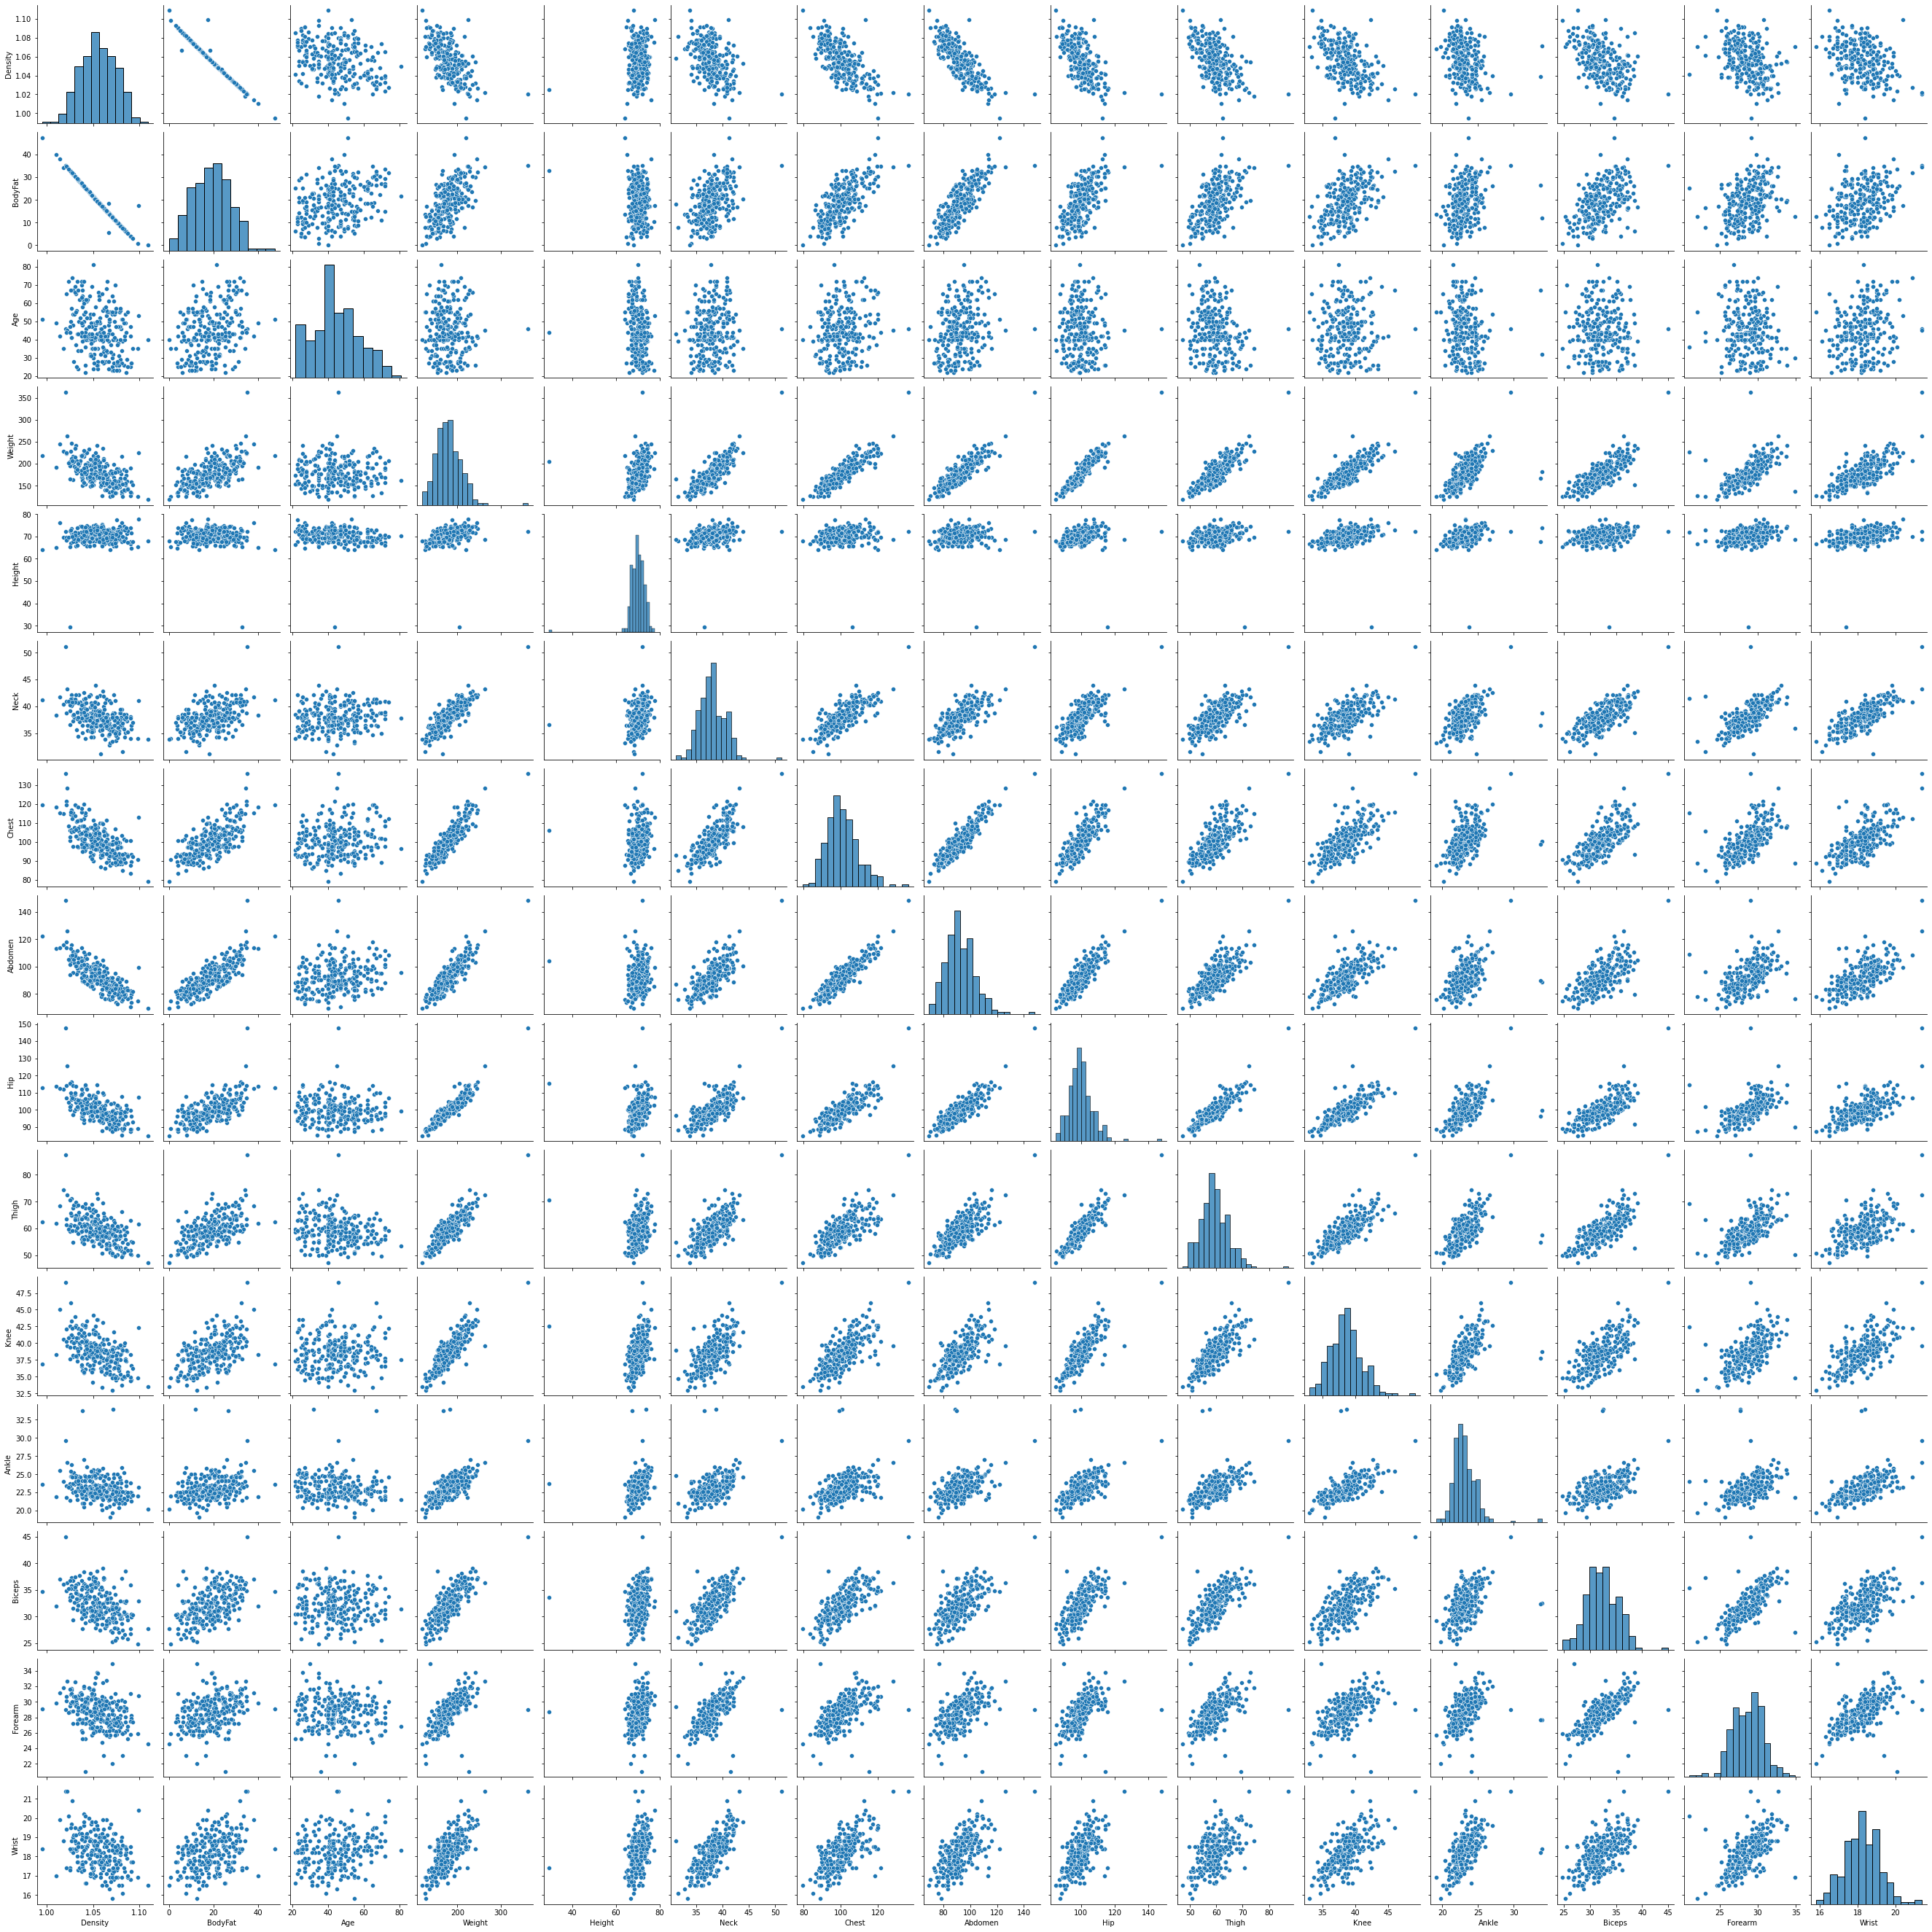

In [8]:
# độ phân tán của từ thuộc tính dữ liệu với nhau
sns.pairplot(df)

In [9]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


<AxesSubplot:>

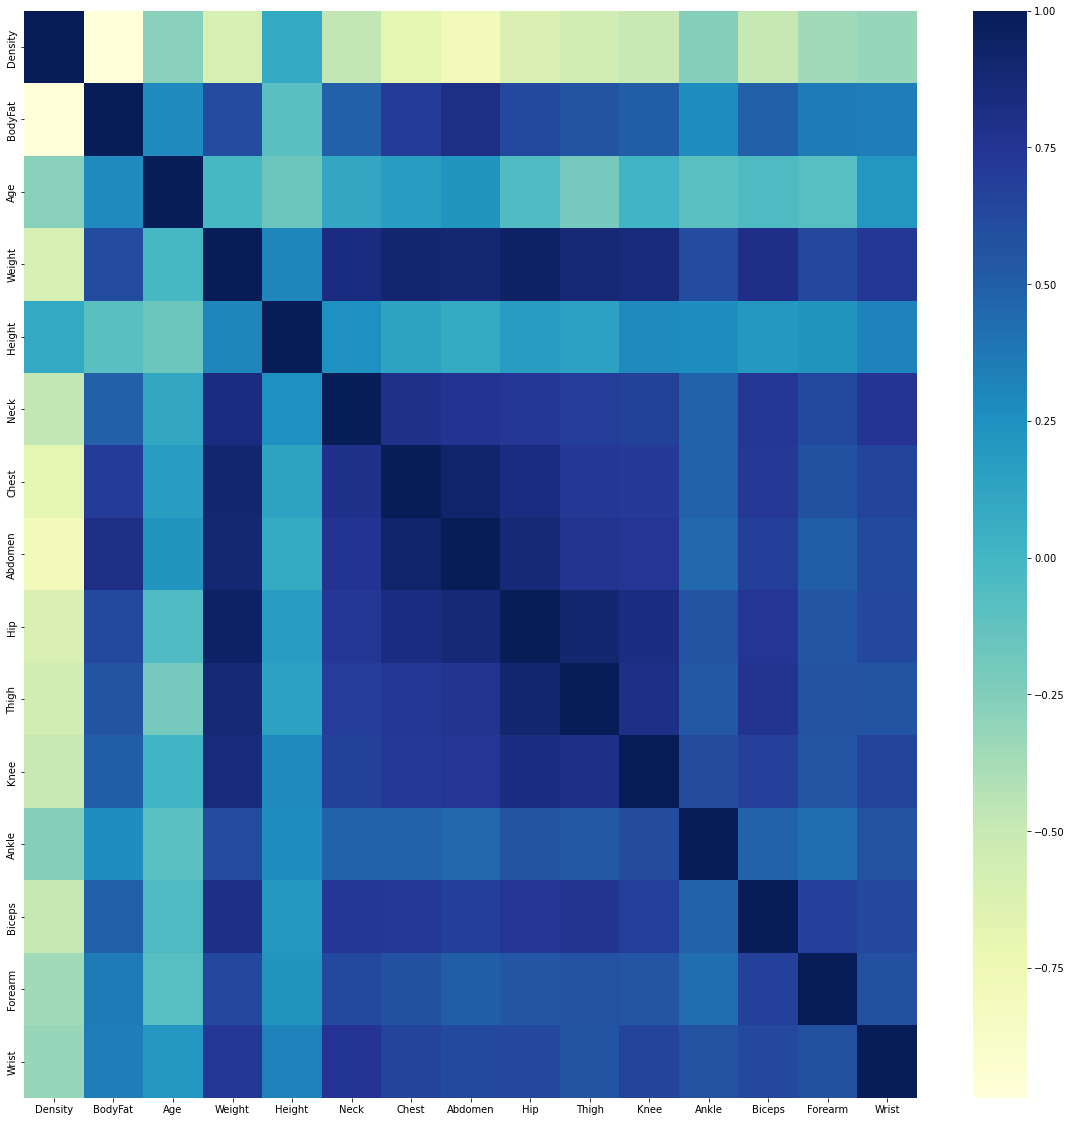

In [10]:
#biểu đồ thể hiện sự tương quan tuyến tính giữa các thuộc tình 
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap='YlGnBu')

C:\Users\manhm\AppData\Local\Temp/ipykernel_1156/3658234180.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\manhm\AppData\Local\Temp/ipykernel_1156/3658234180.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\manhm\AppData\Local\Temp/ipykernel_1156/3658234180.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\manhm\AppData\Local\Temp/ipykernel_1156/3658234180.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\manhm\AppData\Local\Temp/ipykernel_1156/3658234180.py:6: UserWarning: Matplotlib is currently using module://ma

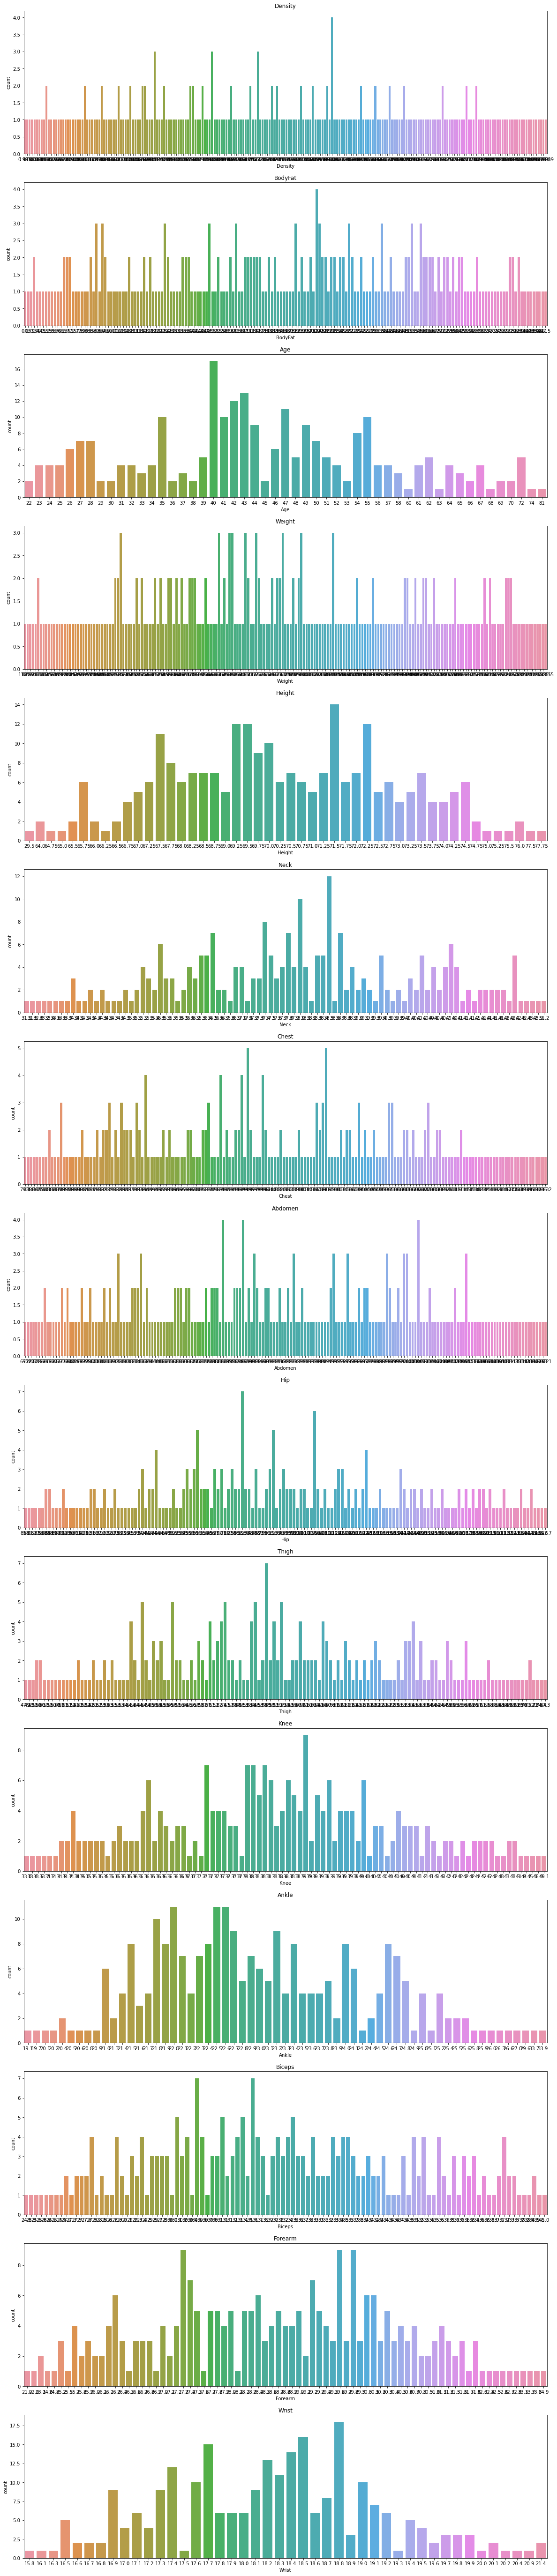

In [11]:
fig, ax =plt.subplots(15,1,figsize=(20,100))
x=0
for i in range(0,15):
    sns.countplot(x=df.columns[x],data=df,ax=ax[i]);
    ax[i].set_title(df.columns[x])
    fig.show()
    x+=1

# Choose Input Data and Output Data

In [12]:
#chọn dữ liệu đầu ra output là BodyFat
y=np.array(df['BodyFat'])
print(y[:10])
y.shape

[12.3  6.1 25.3 10.4 28.7 20.9 19.2 12.4  4.1 11.7]


(252,)

In [13]:
#chon dữ liệu đầu vào là các thuộc tính có  trị tuyệt đối của độ tương quan tuyến tính trên 0.5
x=np.array(df[['Density','Weight','Chest','Abdomen','Hip','Thigh','Knee','Biceps','Neck']])
print(x[:5])
x.shape

[[  1.0708 154.25    93.1     85.2     94.5     59.      37.3     32.
   36.2   ]
 [  1.0853 173.25    93.6     83.      98.7     58.7     37.3     30.5
   38.5   ]
 [  1.0414 154.      95.8     87.9     99.2     59.6     38.9     28.8
   34.    ]
 [  1.0751 184.75   101.8     86.4    101.2     60.1     37.3     32.4
   37.4   ]
 [  1.034  184.25    97.3    100.     101.9     63.2     42.2     32.2
   34.4   ]]


(252, 9)

**Phân chia tập dữ liệu train – test theo tỉ lệ 70% - 30%**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.3)

In [15]:
#do các thuộc tính đầu vào thang đo không đều cần chuẩn hóa về một thang do 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
print(X_train[0:15])

[[ 1.00867388 -1.14386367 -1.48603962 -1.85641413 -1.24197266 -1.08624763
  -0.71897182 -1.52365358 -1.67587972]
 [ 1.10115707 -0.91572971 -0.9415709  -1.3940483  -0.88657041 -0.44853144
  -1.10620452 -0.21922512 -1.1076502 ]
 [ 0.0581523   0.08805971  0.17211511  0.10864065  0.16482789 -0.06203678
   0.52877798 -0.28787925  0.5533284 ]
 [-0.51216065 -0.6328436   0.46909805 -0.11290965 -0.84214513 -0.27460885
   0.44272627 -1.04307467 -0.62684061]
 [-0.9129211  -0.56896609 -0.69408512  0.27239521  0.10559418 -0.46785618
  -1.10620452 -1.52365358 -1.23878009]
 [-1.81206313  1.6667467   2.60985006  2.10259328  1.12737563  0.82690093
   0.78693312  0.87924096  1.29639777]
 [ 0.46405071 -0.62371824 -0.1496164  -0.84498888 -0.29423334  0.24715894
   0.09851943  0.7419327  -0.45200076]
 [-1.7709595   3.11767867  3.43892742  3.28740571  3.86693458  2.5661269
   0.48575213  1.42847399  2.30172693]
 [ 1.37346865 -1.34462155 -1.15193382 -1.22066111 -1.55294962 -1.56936596
  -1.49343722 -0.459514

# Training Model

**Linear Regression**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
LR_model= linear_model.LinearRegression()
scores = cross_val_score(estimator=LR_model, X=X_train, y=y_train, cv=10)
print("Giá trị trung bình :",scores.mean())
LR_model.fit(X_train,y_train)
print("Hệ số góc:",LR_model.coef_)
print("Hệ số chặn",LR_model.intercept_)

Giá trị trung bình : 0.9711204861384694
Hệ số góc: [-7.81046285  0.41083423  0.14109433  0.636012   -0.03253615 -0.40157305
  0.06731123 -0.13803358 -0.05745149]
Hệ số chặn 18.943749999999994


### DecisionTree Regression

In [20]:
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':range(1,10)}
clf = GridSearchCV( DecisionTreeRegressor(), parameters)
clf.fit(X_train,y_train)
DStree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.9693411419676595 {'max_depth': 6}


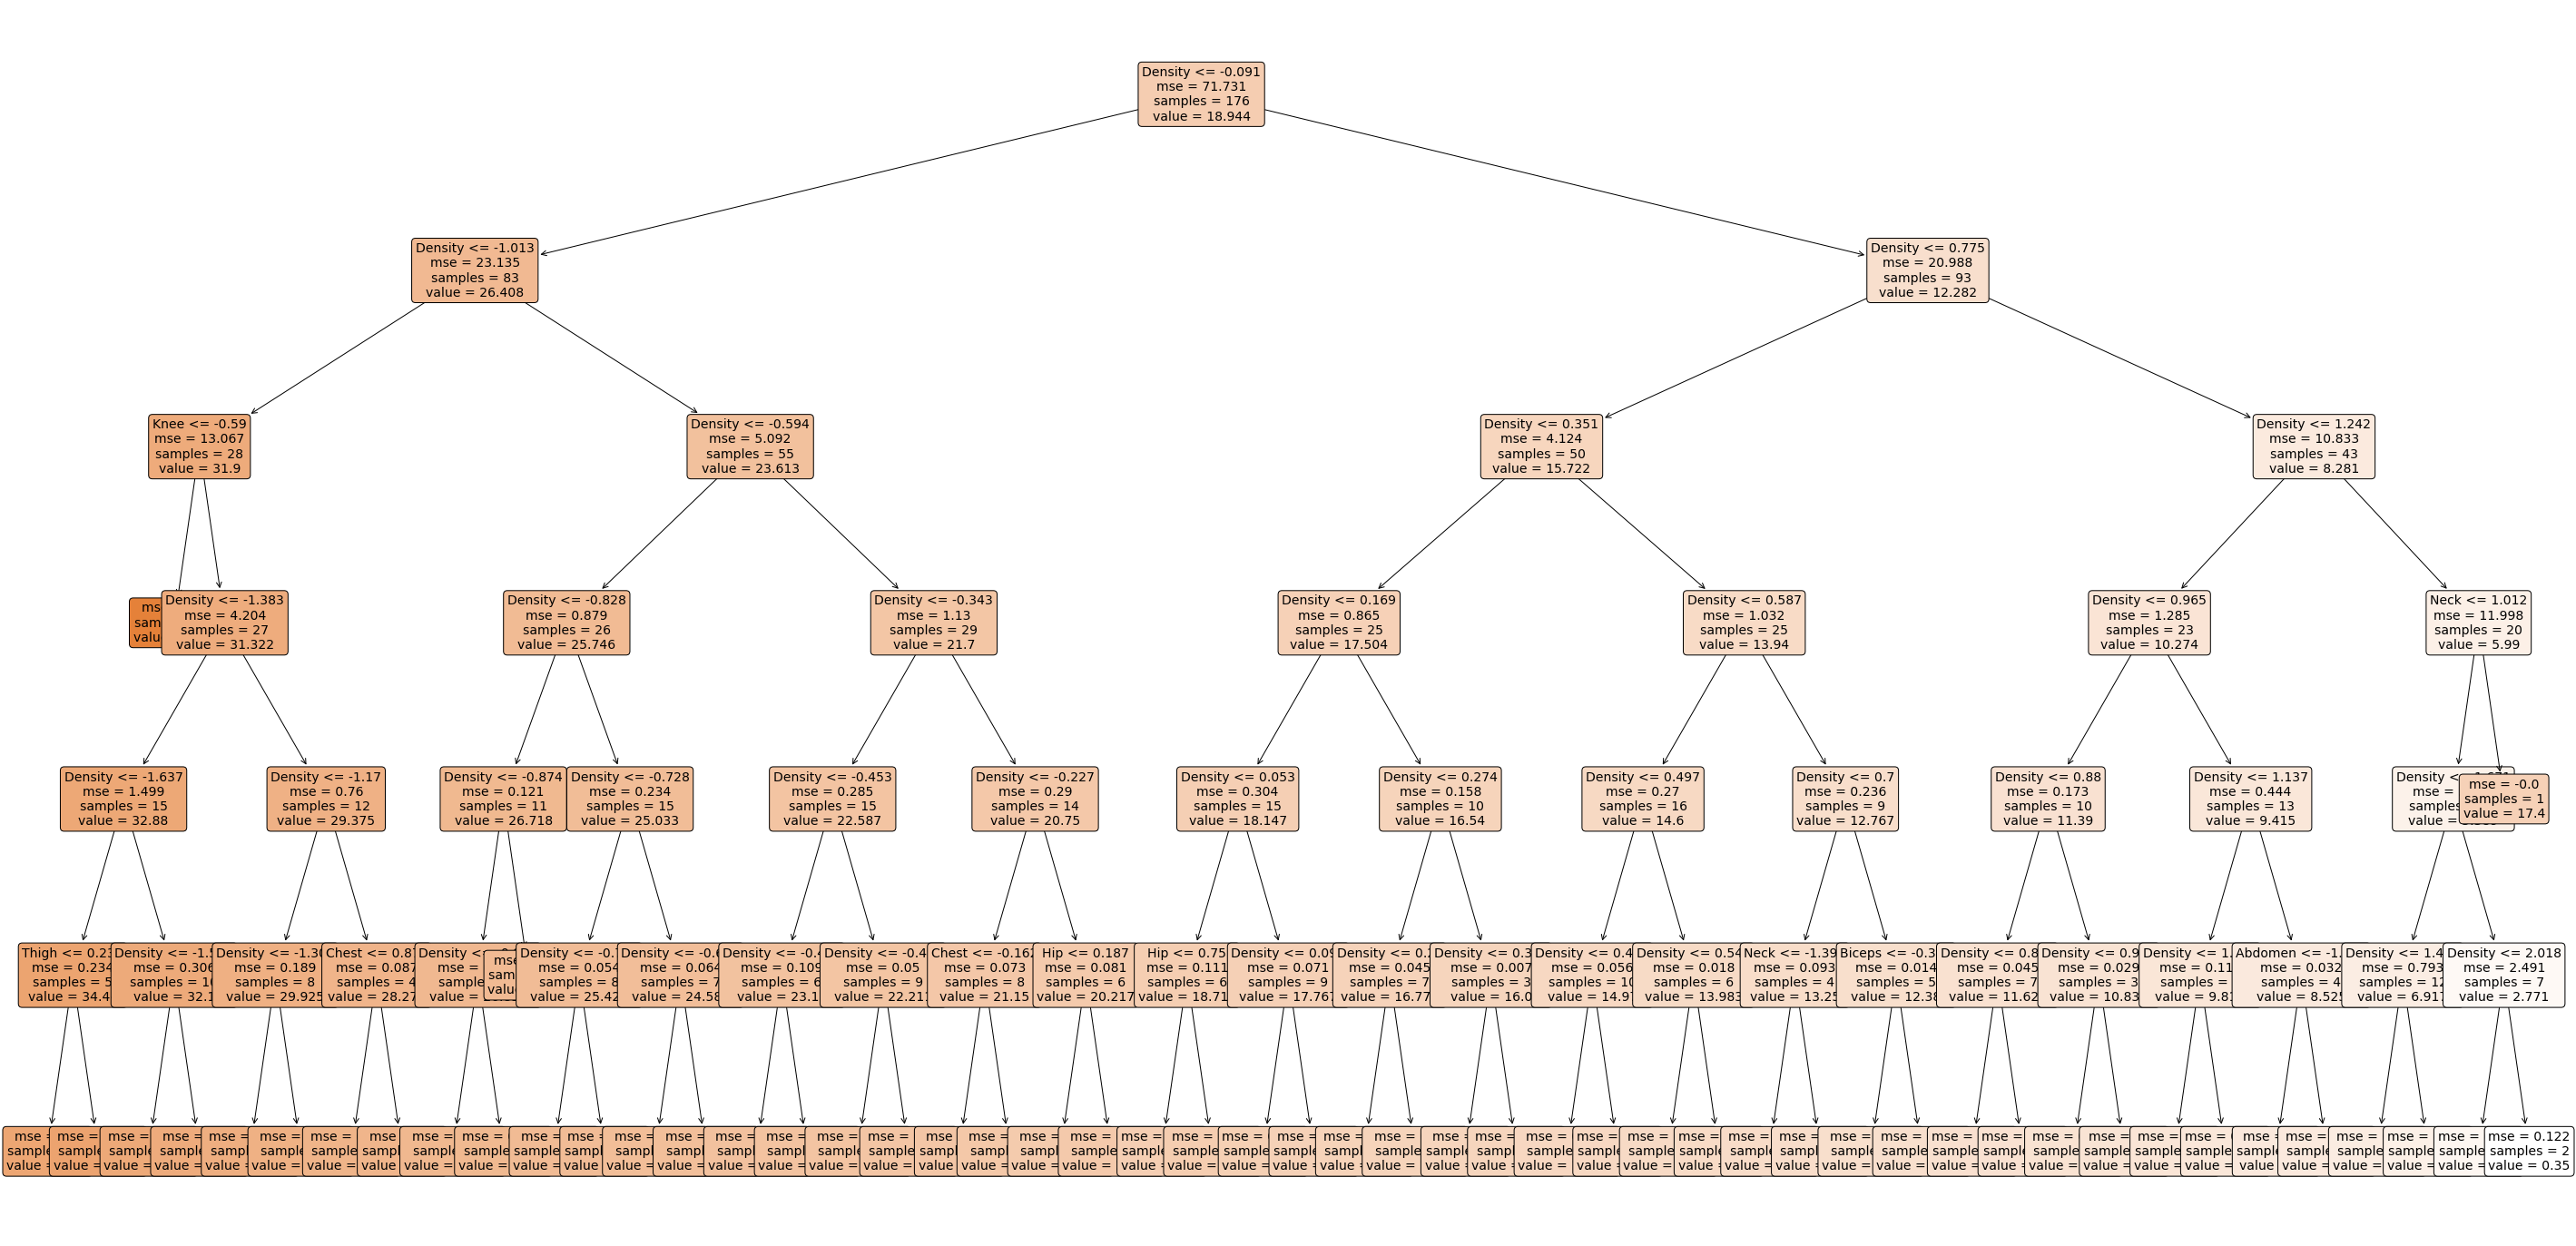

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,25))
a = plot_tree(DStree_model, 
              feature_names=['Density','Weight','Chest','Abdomen','Hip','Thigh','Knee','Biceps','Neck'], 
              class_names='BodyFat', 
              filled=True, 
              rounded=True, 
              fontsize=14)

# Evaluate Model

In [19]:
y_pred= LR_model.predict(X_test)
print('R2:',LR_model.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.9778569040417197
MAE: 0.682400679989735
MSE: 1.6331672861680262
RMSE: 1.2779543364956458


In [22]:
y_pred = DStree_model.predict(X_test)
print('R2:',DStree_model.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.9995160587205264
MAE: 0.543092105263158
MSE: 1.8763522295321642
RMSE: 1.3698000691824206
